### Q-COMMERCE CONSUMER AND DELIVERY ANALYSIS

In [2]:
#Import all the required libraries
from google.cloud import bigquery
import pandas as pd
import os
import re
from pandas_gbq import to_gbq
import seaborn as sns
import matplotlib.pyplot as plt

In [316]:
#Establishing a connection with the BigQuery Datasets using JSON Key
google_credentials_path = os.getenv("GOOGLE_APPLICATION_CREDENTIALS")
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = google_credentials_path

#Querying the data 'delivery_reviews' table in the Bigquery dataset
client = bigquery.Client()
query = """
    SELECT * FROM `data-analysis-458211.dataset_1.delivery_reviews`
    """

#Convert data to dataframe
qcommerce_delivery_reviews = client.query(query).to_dataframe()
qcommerce_delivery_reviews.head()

,Agent Name,Rating,Review Text,Delivery Time _min_,Location,Order Type,Customer Feedback Type,Price Range,Discount Applied,Product Availability,Customer Service Rating,Order Accuracy
0,Zepto,1.0,Drive collection machine they begin support sh...,23,Ahmedabad,Food,Neutral,High,True,Out of Stock,1,Incorrect
1,Zepto,1.0,Nothing by single book shake once seek.,28,Ahmedabad,Pharmacy,Positive,Medium,True,Out of Stock,4,Incorrect
2,Swiggy Instamart,1.0,Onto animal far attention your Mrs sell choose...,37,Ahmedabad,Pharmacy,Negative,Medium,False,In Stock,4,Correct
3,JioMart,1.0,Plant know commercial face raise quality these...,31,Ahmedabad,Pharmacy,Positive,High,True,In Stock,3,Incorrect
4,JioMart,1.0,Vote month down cover around likely quickly mo...,39,Ahmedabad,Grocery,Neutral,Medium,False,In Stock,2,Incorrect


In [4]:
qcommerce_delivery_reviews.tail() #checking the tail of the data

,Agent Name,Rating,Review Text,Delivery Time _min_,Location,Order Type,Customer Feedback Type,Price Range,Discount Applied,Product Availability,Customer Service Rating,Order Accuracy
4995,Zepto,5.0,My follow doctor room cover song environmental...,14,Pune,Food,Neutral,Medium,False,Out of Stock,4,Correct
4996,JioMart,5.0,From ask ask factor turn admit environment pro...,45,Pune,Grocery,Positive,Medium,True,Out of Stock,5,Correct
4997,Zepto,5.0,Huge option hotel important later voice like c...,36,Pune,Essentials,Positive,Low,False,Out of Stock,5,Correct
4998,JioMart,5.0,Bad heart job this something remember hit.,22,Pune,Food,Negative,Medium,True,Out of Stock,3,Correct
4999,Blinkit,5.0,Large Congress week type call town first some ...,22,Pune,Electronics,Positive,Medium,False,In Stock,2,Correct


In [5]:
qcommerce_delivery_reviews.dtypes #Inspecting datatypes accross the dataset

Agent Name                  object
Rating                     float64
Review Text                 object
Delivery Time _min_          Int64
Location                    object
Order Type                  object
Customer Feedback Type      object
Price Range                 object
Discount Applied           boolean
Product Availability        object
Customer Service Rating      Int64
Order Accuracy              object
dtype: object

In [6]:
#Checking for null values
qcommerce_delivery_reviews.isnull().sum() 

Agent Name                 0
Rating                     0
Review Text                0
Delivery Time _min_        0
Location                   0
Order Type                 0
Customer Feedback Type     0
Price Range                0
Discount Applied           0
Product Availability       0
Customer Service Rating    0
Order Accuracy             0
dtype: int64

In [7]:
qcommerce_delivery_reviews.describe() #Calculate measures of central tendancy and other values

,Rating,Delivery Time _min_,Customer Service Rating
count,5000.00000,5000.0,5000.0
mean,3.00290,34.9624,2.972
std,1.15214,14.789656,1.409969
min,1.00000,10.0,1.0
25%,2.00000,22.0,2.0
50%,3.00000,35.0,3.0
75%,4.00000,48.0,4.0
max,5.00000,60.0,5.0


In [8]:
qcommerce_delivery_reviews['Location'].value_counts()

Location
Kolkata      517
Ahmedabad    515
Pune         515
Delhi        514
Bangalore    513
Mumbai       498
Hyderabad    490
Jaipur       489
Chennai      478
Lucknow      471
Name: count, dtype: int64

In [9]:
qcommerce_delivery_reviews.columns

Index(['Agent Name', 'Rating', 'Review Text', 'Delivery Time _min_',
       'Location', 'Order Type', 'Customer Feedback Type', 'Price Range',
       'Discount Applied', 'Product Availability', 'Customer Service Rating',
       'Order Accuracy'],
      dtype='object')

In [10]:
# Standardizing column names to remove inconsistencies and make it uniform
qcommerce_delivery_reviews.columns = qcommerce_delivery_reviews.columns.str.strip().str.lower().str.replace(r'\s+','_',regex=True).str.replace('_min_','min')

print(qcommerce_delivery_reviews.columns)

Index(['agent_name', 'rating', 'review_text', 'delivery_time_min', 'location',
       'order_type', 'customer_feedback_type', 'price_range',
       'discount_applied', 'product_availability', 'customer_service_rating',
       'order_accuracy'],
      dtype='object')


In [11]:
qcommerce_delivery_reviews.head()

,agent_name,rating,review_text,delivery_time_min,location,order_type,customer_feedback_type,price_range,discount_applied,product_availability,customer_service_rating,order_accuracy
0,Zepto,1.0,Drive collection machine they begin support sh...,23,Ahmedabad,Food,Neutral,High,True,Out of Stock,1,Incorrect
1,Zepto,1.0,Nothing by single book shake once seek.,28,Ahmedabad,Pharmacy,Positive,Medium,True,Out of Stock,4,Incorrect
2,Swiggy Instamart,1.0,Onto animal far attention your Mrs sell choose...,37,Ahmedabad,Pharmacy,Negative,Medium,False,In Stock,4,Correct
3,JioMart,1.0,Plant know commercial face raise quality these...,31,Ahmedabad,Pharmacy,Positive,High,True,In Stock,3,Incorrect
4,JioMart,1.0,Vote month down cover around likely quickly mo...,39,Ahmedabad,Grocery,Neutral,Medium,False,In Stock,2,Incorrect


In [ ]:
#Upload cleaned data to bigquery to query data 
to_gbq(
    dataframe=qcommerce_delivery_reviews,
    destination_table='dataset_1.qcommerce_delivery_reviews',
    project_id='data-analysis-458211',
    if_exists='replace'  
)

100%|██████████| 1/1 [00:00<00:00, 5518.82it/s]


In [31]:
#Querying all the required data from the dataset
client = bigquery.Client()

query2 = """
        SELECT agent_name, rating, delivery_time_min, location, customer_feedback_type, customer_service_rating, order_accuracy, order_type
        FROM `data-analysis-458211.dataset_1.qcommerce_delivery_reviews`
        """
Qcommerce_reviews = client.query(query2).to_dataframe()
Qcommerce_reviews.head()

,agent_name,rating,delivery_time_min,location,customer_feedback_type,customer_service_rating,order_accuracy,order_type
0,Blinkit,1.1,32,Ahmedabad,Neutral,3,Correct,Electronics
1,Blinkit,1.2,53,Ahmedabad,Neutral,3,Correct,Electronics
2,Blinkit,1.4,25,Ahmedabad,Negative,4,Correct,Electronics
3,Blinkit,1.5,41,Ahmedabad,Negative,5,Incorrect,Electronics
4,Blinkit,1.6,27,Ahmedabad,Negative,3,Incorrect,Electronics


In [297]:
#Query to aggregate positive reviews from customer feedback for all Agents
query3 = """
        SELECT agent_name AS Agent_name, COUNT(*) AS Positive_review_count
        FROM `data-analysis-458211.dataset_1.qcommerce_delivery_reviews`
        WHERE customer_feedback_type = 'Positive'
        GROUP BY agent_name
        ORDER BY Positive_review_count DESC
        """
positive_reviews = client.query(query3).to_dataframe()
positive_reviews.head()

,Agent_name,Positive_review_count
0,Blinkit,435
1,Zepto,428
2,JioMart,407
3,Swiggy Instamart,378


In [298]:
#Upload aggregated data to bigquery for further use
positive_reviews.to_csv('positive_reviews.csv', index=False)
print("Saved successfully!")

to_gbq(
    dataframe= positive_reviews,
    destination_table='dataset_1.positive_reviews',
    project_id='data-analysis-458211',
    if_exists='replace'
)

Saved successfully!


100%|██████████| 1/1 [00:00<00:00, 2525.17it/s]


<Axes: xlabel='Positive_count', ylabel='Agent_name'>

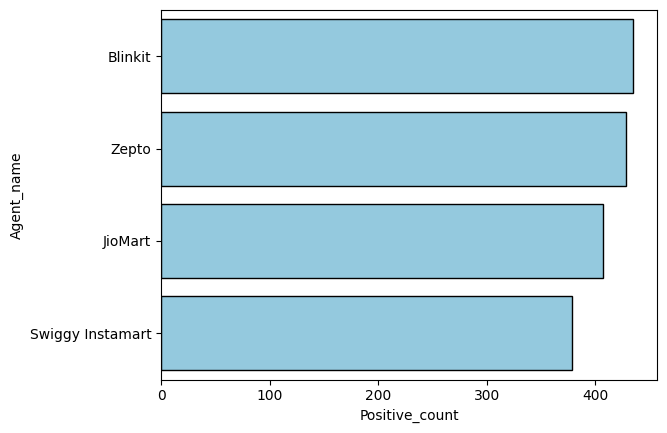

In [217]:
#Bar plot to compare positive reviews 
sns.barplot(x='Positive_count',y='Agent_name', data= positive_reviews, color= 'skyblue', edgecolor='black')

In [32]:
#Aggregate data to populate accurate orders for each platform
query4 = """
        SELECT agent_name AS Agent_name, COUNT(*) AS Count
        FROM `data-analysis-458211.dataset_1.qcommerce_delivery_reviews`
        WHERE order_accuracy = 'Correct'
        GROUP BY agent_name
        ORDER BY Count DESC
        """
order_accuracy = client.query(query4).to_dataframe()
order_accuracy.head()

,Agent_name,Count
0,Zepto,669
1,Blinkit,638
2,Swiggy Instamart,610
3,JioMart,598


In [299]:
#Upload aggregated data to bigquery for further use
to_gbq(
    dataframe= order_accuracy,
    destination_table='dataset_1.order_accuracy',
    project_id='data-analysis-458211',
    if_exists='replace'
)

100%|██████████| 1/1 [00:00<00:00, 5322.72it/s]


<Axes: xlabel='Count', ylabel='Agent_name'>

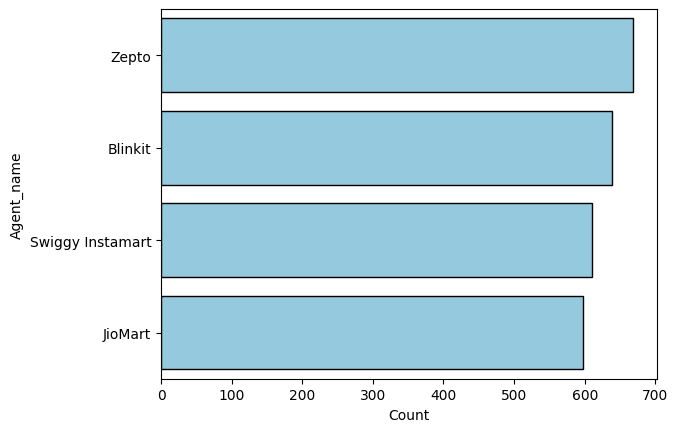

In [224]:
#Bar plot for order accuracy comparision
sns.barplot(x='Count',y='Agent_name', data=order_accuracy, color= 'skyblue', edgecolor='black')

In [301]:
#Location based order accuracy aggregation
query5 = """
        SELECT agent_name AS Agent_name, Location, COUNT(*) AS Count, 
        FROM `data-analysis-458211.dataset_1.qcommerce_delivery_reviews`
        WHERE order_accuracy = 'Correct'
        GROUP BY Location, agent_name
        ORDER BY Count DESC
        """
location_wise_accuracy = client.query(query5).to_dataframe()
location_wise_accuracy.head()

,Agent_name,Location,Count
0,Blinkit,Delhi,81
1,Zepto,Bangalore,81
2,Zepto,Pune,81
3,Zepto,Kolkata,75
4,Blinkit,Jaipur,74


In [304]:
#Upload aggregated data for further use
to_gbq(
    dataframe= location_wise_accuracy,
    destination_table='dataset_1.location_wise_accuracy',
    project_id='data-analysis-458211',
    if_exists='replace'
)

100%|██████████| 1/1 [00:00<00:00, 5461.33it/s]


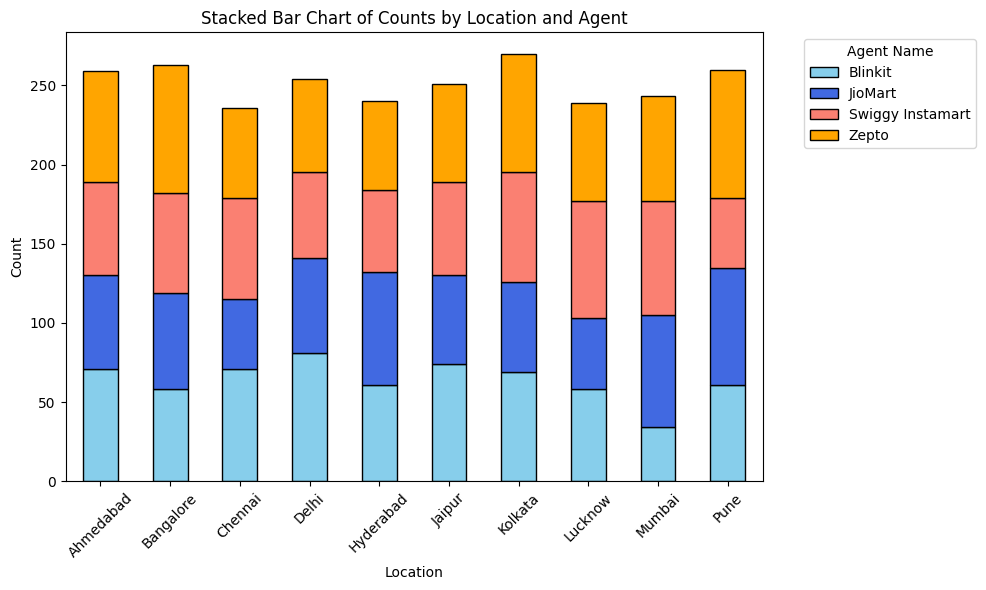

In [312]:
# Pivot the DataFrame
pivoted_location_data = location_wise_accuracy.pivot_table(values='Count', index='Location', columns='Agent_name', fill_value=0)

# Define colors 
colors = ['skyblue', 'royalblue', 'salmon', 'orange']

# Plot stacked bar chart
pivoted_location_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors, edgecolor='black')
plt.title("Stacked Bar Chart of Counts by Location and Agent")
plt.xlabel("Location")
plt.ylabel("Count")
plt.legend(title='Agent Name',  bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
# Query and aggregate data for each order type with respect to each Agent
query6 = """
        SELECT agent_name AS Agent_name, order_type AS Order_type, COUNT(*) AS Count
        FROM `data-analysis-458211.dataset_1.qcommerce_delivery_reviews`
        WHERE order_accuracy = 'Correct'
        GROUP BY agent_name, order_type
        ORDER BY Count DESC
        """
ordertype_wise_analysis = client.query(query6).to_dataframe()
ordertype_wise_analysis.head()

,Agent_name,Order_type,Count
0,Zepto,Electronics,143
1,Blinkit,Electronics,138
2,Zepto,Essentials,136
3,Zepto,Food,135
4,Zepto,Pharmacy,135


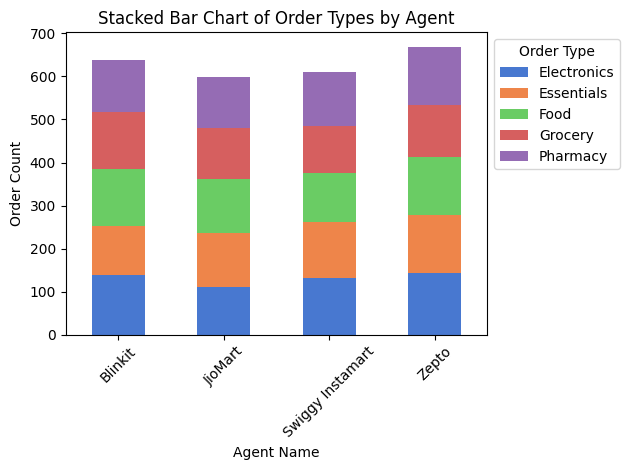

In [226]:
# Plotting a stacked bar for order type analysis
sns.set_palette("muted")
pivoted_df = ordertype_wise_analysis.pivot(index='Agent_name',columns='Order_type',values='Count').fillna(0)

pivoted_df.plot(kind='bar',stacked=True)
plt.xlabel("Agent Name")
plt.ylabel("Order Count")
plt.title("Stacked Bar Chart of Order Types by Agent")
plt.legend(title='Order Type',loc='upper left', bbox_to_anchor=(1, 1)) 
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
# Aggregate data based on Customer rating and additional filters
query7 = """
        SELECT agent_name AS Agent_name, COUNT(*) AS Rated_5_Count
        FROM `data-analysis-458211.dataset_1.qcommerce_delivery_reviews`
        WHERE order_accuracy = 'Correct' AND customer_service_rating = 5
        GROUP BY agent_name
        ORDER BY Rated_5_Count DESC
        """
customer_rating_analysis = client.query(query7).to_dataframe()
customer_rating_analysis.head()

,Agent_name,Rated_5_Count
0,JioMart,135
1,Blinkit,131
2,Zepto,131
3,Swiggy Instamart,114


/var/folders/9m/xmb6cfqs55d_cp4t3s4m_9180000gn/T/ipykernel_64260/2060952360.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = 'Agent_name', y = 'Rated_5_Count', data = customer_rating_analysis, color = 'orange', edgecolor='black', ci=False)


<Axes: xlabel='Agent_name', ylabel='Rated_5_Count'>

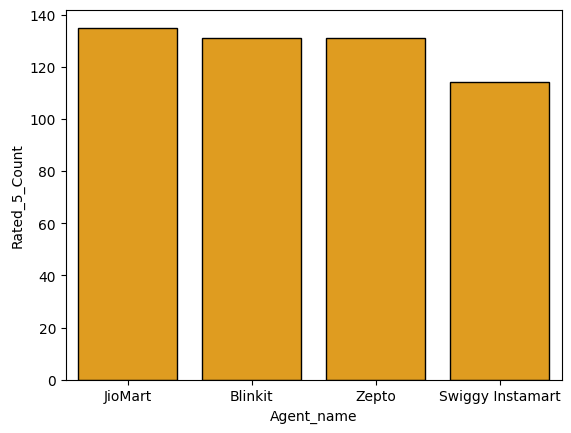

In [233]:
# Bar plot for all Agents rated 5
sns.barplot(x = 'Agent_name', y = 'Rated_5_Count', data = customer_rating_analysis, color = 'orange', edgecolor='black', ci=False)

In [ ]:
#Query and categorize ratings
query8 = """
        SELECT agent_name AS Agent_name, COUNT(*) AS Count, rating AS Rating
        FROM `data-analysis-458211.dataset_1.qcommerce_delivery_reviews`
        WHERE order_accuracy = 'Correct'
        GROUP BY agent_name, rating
        ORDER BY rating DESC
        """
agent_rating = client.query(query8).to_dataframe()
# agent_rating.head()

#Function to categorize ratings of agents
def categorize_rating(rating):
    if 1.0 <= rating <= 2.0:
        return 'Low'
    elif 3.0 <= rating <= 3.9:
        return 'Medium'
    else:
        return 'High'
    
agent_rating['Rating_Category']=agent_rating['Rating'].apply(categorize_rating)
agent_rating = agent_rating.groupby(['Agent_name', 'Rating_Category']).size().reset_index(name='Count')

print(agent_rating)

          Agent_name Rating_Category  Count
0            Blinkit            High     20
1            Blinkit             Low     11
2            Blinkit          Medium     10
3            JioMart            High     20
4            JioMart             Low     11
5            JioMart          Medium     10
6   Swiggy Instamart            High     20
7   Swiggy Instamart             Low     11
8   Swiggy Instamart          Medium     10
9              Zepto            High     20
10             Zepto             Low     11
11             Zepto          Medium     10


In [313]:
# Upload aggregated data to bigquery dataset
to_gbq(
    dataframe= agent_rating,
    destination_table='dataset_1.agent_rating',
    project_id='data-analysis-458211',
    if_exists='replace'
)

100%|██████████| 1/1 [00:00<00:00, 3964.37it/s]


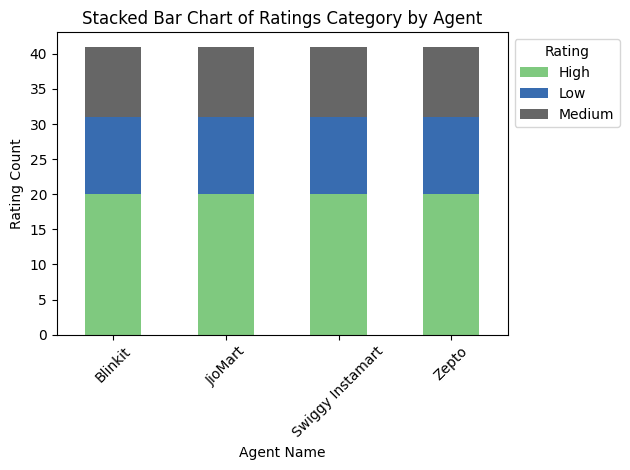

In [ ]:
# Visualize Ratings by category for each Agent
pivoted_rating_df = agent_rating.pivot(index='Agent_name',columns='Rating_Category',values='Count').fillna(0)

pivoted_rating_df.plot(kind='bar',stacked=True, colormap='Accent')
plt.xlabel("Agent Name")
plt.ylabel("Rating Count")
plt.title("Stacked Bar Chart of Ratings Category by Agent")
plt.legend(title='Rating',loc='upper left', bbox_to_anchor=(1, 1)) 
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Query and aggregate all customer feedback type measures for Zepto
query = """
        SELECT COUNT(*) AS Zepto_Count, MAX(delivery_time_min) AS max_delivery_time, MIN(delivery_time_min) AS min_delivery_time, 
                ROUND(AVG(delivery_time_min),2) AS avg_delivery_time,
                SUM(CASE WHEN order_accuracy = 'Correct' THEN 1 ELSE 0 END) AS correctly_delivered,
                SUM(CASE WHEN order_accuracy = 'Incorrect' THEN 1 ELSE 0 END) AS incorrectly_delivered,
                ROUND(SUM(CASE WHEN order_accuracy = 'Correct' THEN 1 ELSE 0 END)* 100.0/ COUNT(*),2) AS correctly_delivered_percent,
                SUM(CASE WHEN customer_feedback_type = 'Positive' THEN 1 ELSE 0 END) AS positive_feedbacks,
                SUM(CASE WHEN customer_feedback_type = 'Negative' THEN 1 ELSE 0 END) AS negative_feedbacks,
                ROUND(SUM(CASE WHEN customer_feedback_type = 'Positive' THEN 1 ELSE 0 END)* 100.0/ COUNT(*),2) AS positive_feedback_percent
        FROM `data-analysis-458211.dataset_1.qcommerce_delivery_reviews`
        WHERE agent_name = 'Zepto'
        ORDER BY Zepto_Count DESC
        """
zepto_data_analysis = client.query(query).to_dataframe()
zepto_data_analysis.head()

,Zepto_Count,max_delivery_time,min_delivery_time,avg_delivery_time,correctly_delivered,incorrectly_delivered,correctly_delivered_percent,positive_feedbacks,negative_feedbacks,positive_feedback_percent
0,1282,60,10,35.06,669,613,52.18,428,443,33.39


In [78]:
# Query and aggregate all customer feedback type measures for Blinkit
query = """
        SELECT COUNT(*) AS Blinkit_Count, MAX(delivery_time_min) AS max_delivery_time, MIN(delivery_time_min) AS min_delivery_time, 
                ROUND(AVG(delivery_time_min),2) AS avg_delivery_time,
                SUM(CASE WHEN order_accuracy = 'Correct' THEN 1 ELSE 0 END) AS correctly_delivered,
                SUM(CASE WHEN order_accuracy = 'Incorrect' THEN 1 ELSE 0 END) AS incorrectly_delivered,
                ROUND(SUM(CASE WHEN order_accuracy = 'Correct' THEN 1 ELSE 0 END)* 100.0/ COUNT(*),2) AS correctly_delivered_percent,
                SUM(CASE WHEN customer_feedback_type = 'Positive' THEN 1 ELSE 0 END) AS positive_feedbacks,
                SUM(CASE WHEN customer_feedback_type = 'Negative' THEN 1 ELSE 0 END) AS negative_feedbacks,
                ROUND(SUM(CASE WHEN customer_feedback_type = 'Positive' THEN 1 ELSE 0 END)* 100.0/ COUNT(*),2) AS positive_feedback_percent
        FROM `data-analysis-458211.dataset_1.qcommerce_delivery_reviews`
        WHERE agent_name = 'Blinkit'
        ORDER BY Blinkit_Count DESC
        """
blinkit_data_analysis = client.query(query).to_dataframe()
blinkit_data_analysis.head()

,Blinkit_Count,max_delivery_time,min_delivery_time,avg_delivery_time,correctly_delivered,incorrectly_delivered,correctly_delivered_percent,positive_feedbacks,negative_feedbacks,positive_feedback_percent
0,1272,60,10,34.65,638,634,50.16,435,424,34.2


In [79]:
# Query and aggregate all customer feedback type measures for Instamart
query = """
        SELECT COUNT(*) AS Instamart_Count, MAX(delivery_time_min) AS max_delivery_time, MIN(delivery_time_min) AS min_delivery_time, 
                ROUND(AVG(delivery_time_min),2) AS avg_delivery_time,
                SUM(CASE WHEN order_accuracy = 'Correct' THEN 1 ELSE 0 END) AS correctly_delivered,
                SUM(CASE WHEN order_accuracy = 'Incorrect' THEN 1 ELSE 0 END) AS incorrectly_delivered,
                ROUND(SUM(CASE WHEN order_accuracy = 'Correct' THEN 1 ELSE 0 END)* 100.0/ COUNT(*),2) AS correctly_delivered_percent,
                SUM(CASE WHEN customer_feedback_type = 'Positive' THEN 1 ELSE 0 END) AS positive_feedbacks,
                SUM(CASE WHEN customer_feedback_type = 'Negative' THEN 1 ELSE 0 END) AS negative_feedbacks,
                ROUND(SUM(CASE WHEN customer_feedback_type = 'Positive' THEN 1 ELSE 0 END)* 100.0/ COUNT(*),2) AS positive_feedback_percent
        FROM `data-analysis-458211.dataset_1.qcommerce_delivery_reviews`
        WHERE agent_name = 'Swiggy Instamart'
        ORDER BY Instamart_Count DESC
        """
instamart_data_analysis = client.query(query).to_dataframe()
instamart_data_analysis.head()

,Instamart_Count,max_delivery_time,min_delivery_time,avg_delivery_time,correctly_delivered,incorrectly_delivered,correctly_delivered_percent,positive_feedbacks,negative_feedbacks,positive_feedback_percent
0,1222,60,10,35.12,610,612,49.92,378,438,30.93


Quick commerce consumer behaviour reviews dataset

In [82]:
# Read consumer behaviour data collected from kaggle
consumer_reviews = pd.read_excel("/Users/prudhvileo/Downloads/Quick_Commerce_Consumer_Behavior.xlsx")
consumer_reviews.head()

,Timestamp,Name,Gender,Age,How much is your average spend on an order?,At what time of the day generally do you order?,Home City,Current Residence City,Status of your accommodation in your Current City,Occupation,...,What would motivate you to switch from your current quick commerce platform to Flipkart?,What concerns do you have about switching to Flipkart’s quick commerce service?,How likely are you to try Flipkart’s quick commerce service if they offered First order free up to Rs. 399/-,How likely are you to try Flipkart’s quick commerce service if they offered Free delivery for first few orders,How likely are you to try Flipkart’s quick commerce service if they offered Exclusive products not available on other platforms,How likely are you to try Flipkart’s quick commerce service if they offered a subscription-based model,How likely are you to try Flipkart’s quick commerce service if they offered a better integration with Flipkart’s existing services,"If you have used Flipkart’s quick commerce service, how would you rate your experience compared to other platforms?",What would you suggest Flipkart do to become your preferred quick commerce platform?,Can you think of some odd products/services that aren't being delivered through any quick commerce? (For Eg. Blinkit recently started delivering passport size photos to your doorsteps in minutes)
0,2024-08-24 17:43:11.410,Rajat Verma,Male,25-34,100-500,Night,Shimla,Amritsar,Hostel,Student,...,"Better pricing and discounts, More extensive p...","Preference for my current platform’s features,...",Likely,Likely,Very likely,Neutral,Likely,Haven’t used Flipkart’s quick commerce service,Maybe try to deliver some extensive products a...,"Hardware, Computer peripherals, Services like ..."
1,2024-08-24 17:58:21.480,Navin,Male,18-24,100-500,Night,Cuddalore,Amritsar,Hostel,Student,...,"Better pricing and discounts, More extensive p...",Lack of sufficient discounts/offers,Very likely,Very likely,Very likely,Neutral,Neutral,Haven’t used Flipkart’s quick commerce service,"Better product range, better price",Nail cutters
2,2024-08-24 18:01:12.567,Abhinandan Singh,Male,18-24,2000-5000,Night,meerut,Amritsar,Hostel,Student,...,Faster and more reliable delivery,Concerns about product quality,Likely,Likely,Likely,Likely,Likely,Slightly better,na,na
3,2024-08-24 18:01:53.113,Rajnish Raushan,Male,18-24,500-1000,Evening,Gaya,Amritsar,Hostel,Student,...,Better payment options and flexibility,"Fear of delayed deliveries, Unfamiliarity with...",Very likely,Likely,Very likely,Likely,Likely,Slightly better,NaN,NaN
4,2024-08-24 18:05:29.521,Prakhar Sharma,Male,18-24,500-1000,Night,Hisar,Amritsar,Hostel,Student,...,"Better pricing and discounts, Faster and more ...","Concerns about product quality, Preference for...",Very likely,Very likely,Likely,Neutral,Likely,Haven’t used Flipkart’s quick commerce service,Various other platforms have only the larger p...,Stationary


In [93]:
consumer_reviews.isnull().sum() #check for null values

Timestamp                                                                                                                                                                                                                 0
Name                                                                                                                                                                                                                      6
Gender                                                                                                                                                                                                                    0
Age                                                                                                                                                                                                                       0
How much is your average spend on an order?                                                                             

In [96]:
consumer_reviews.shape

(109, 50)

In [ ]:
# Dropping columns with more null values which provide less values while analysis
columns_to_drop = ['What factors influence your choice of a quick commerce platform? ( (Please Rank highest to lowest for e.g.: if you consider Price as topmost priority give it 1)  ) [Price]',
                   'What factors influence your choice of a quick commerce platform? ( (Please Rank highest to lowest for e.g.: if you consider Price as topmost priority give it 1)  ) [Product variety]',
                   'What factors influence your choice of a quick commerce platform? ( (Please Rank highest to lowest for e.g.: if you consider Price as topmost priority give it 1)  ) [Discounts/Offers]',
                   'What factors influence your choice of a quick commerce platform? ( (Please Rank highest to lowest for e.g.: if you consider Price as topmost priority give it 1)  ) [User interface/ease of use]',
                   'What factors influence your choice of a quick commerce platform? ( (Please Rank highest to lowest for e.g.: if you consider Price as topmost priority give it 1)  ) [Customer service]',
                   'What factors influence your choice of a quick commerce platform? ( (Please Rank highest to lowest for e.g.: if you consider Price as topmost priority give it 1)  ) [Payment options]',
                   'What factors influence your choice of a quick commerce platform? ( (Please Rank highest to lowest for e.g.: if you consider Price as topmost priority give it 1)  ) [Return policy]',
                   'What would make you switch from your current quick commerce platform to another? (Please Rank highest to lowest for e.g.: if you consider faster delivery as topmost priority give it 1) [Better pricing]',
                   'What would make you switch from your current quick commerce platform to another? (Please Rank highest to lowest for e.g.: if you consider faster delivery as topmost priority give it 1) [Faster delivery]',
                   'What would make you switch from your current quick commerce platform to another? (Please Rank highest to lowest for e.g.: if you consider faster delivery as topmost priority give it 1) [More product variety]',
                   'What would make you switch from your current quick commerce platform to another? (Please Rank highest to lowest for e.g.: if you consider faster delivery as topmost priority give it 1) [Improved customer service]',
                   'What would make you switch from your current quick commerce platform to another? (Please Rank highest to lowest for e.g.: if you consider faster delivery as topmost priority give it 1) [Better discounts/offers]',
                   'What would make you switch from your current quick commerce platform to another? (Please Rank highest to lowest for e.g.: if you consider faster delivery as topmost priority give it 1) [Better brand personality]',
                   'What additional features or services would you like to see in quick commerce platforms?','How much is your average spend on an order?',
                   'At what time of the day generally do you order?', 'Please state your monthly income.','Please specify if you have any Dependents? (Number of people in your family that are dependent on you financially)',
                   'Do you have loved ones in different city?','How often do you shop online for groceries and essentials?','What factors influence your choice of a quick commerce platform?',
                   'What type of products do you typically order through quick commerce platforms?','What delivery time frame do you expect from a quick commerce platform?',
                   'What challenges have you faced while using quick commerce platforms?','Would you prefer if you have a live product feed (a short video of the product) for fruits, vegetables and other perishables on quick commerce platform? ',
                   'How familiar are you with Flipkart\'s quick commerce service','What would motivate you to switch from your current quick commerce platform to Flipkart?',
                   'What concerns do you have about switching to Flipkart\'s quick commerce service?', 'How likely are you to try Flipkart\'s quick commerce service if they offered First order free up to Rs. 399/-',
                   'How likely are you to try Flipkart\'s quick commerce service if they offered Free delivery for first few orders','How likely are you to try Flipkart\'s quick commerce service if they offered Exclusive products not available on other platforms',
                   'How likely are you to try Flipkart\'s quick commerce service if they offered a subscription-based model','How likely are you to try Flipkart\'s quick commerce service if they offered a better integration with Flipkart\'s existing services',
                   'If you have used Flipkart\'s quick commerce service, how would you rate your experience compared to other platforms?','Can you think of some odd products/services that aren\'t being delivered through any quick commerce? (For Eg. Blinkit recently started delivering passport size photos to your doorsteps in minutes)',
                   'What would you suggest Flipkart do to become your preferred quick commerce platform?']

# Filter columns that exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in consumer_reviews.columns]

consumer_reviews.drop(columns=existing_columns_to_drop, inplace=True)
consumer_reviews.head()

,Timestamp,Name,Gender,Age,Home City,Current Residence City,Status of your accommodation in your Current City,Occupation,Monthly Household Income,Your current relationship status,...,discount_importance,likely_to_recommend,How familiar are you with Flipkart’s quick commerce service,What concerns do you have about switching to Flipkart’s quick commerce service?,How likely are you to try Flipkart’s quick commerce service if they offered First order free up to Rs. 399/-,How likely are you to try Flipkart’s quick commerce service if they offered Free delivery for first few orders,How likely are you to try Flipkart’s quick commerce service if they offered Exclusive products not available on other platforms,How likely are you to try Flipkart’s quick commerce service if they offered a subscription-based model,How likely are you to try Flipkart’s quick commerce service if they offered a better integration with Flipkart’s existing services,"If you have used Flipkart’s quick commerce service, how would you rate your experience compared to other platforms?"
0,2024-08-24 17:43:11.410,Rajat Verma,Male,25-34,Shimla,Amritsar,Hostel,Student,More than 4 Lakh,Single,...,Moderately important,Very likely,Not familiar at all,"Preference for my current platform’s features,...",Likely,Likely,Very likely,Neutral,Likely,Haven’t used Flipkart’s quick commerce service
1,2024-08-24 17:58:21.480,Navin,Male,18-24,Cuddalore,Amritsar,Hostel,Student,Less than 1 Lakh,Single,...,Extremely important,Very likely,Not familiar at all,Lack of sufficient discounts/offers,Very likely,Very likely,Very likely,Neutral,Neutral,Haven’t used Flipkart’s quick commerce service
1,2024-08-24 17:58:21.480,Navin,Male,18-24,Cuddalore,Amritsar,Hostel,Student,Less than 1 Lakh,Single,...,Extremely important,Very likely,Not familiar at all,Lack of sufficient discounts/offers,Very likely,Very likely,Very likely,Neutral,Neutral,Haven’t used Flipkart’s quick commerce service
1,2024-08-24 17:58:21.480,Navin,Male,18-24,Cuddalore,Amritsar,Hostel,Student,Less than 1 Lakh,Single,...,Extremely important,Very likely,Not familiar at all,Lack of sufficient discounts/offers,Very likely,Very likely,Very likely,Neutral,Neutral,Haven’t used Flipkart’s quick commerce service
2,2024-08-24 18:01:12.567,Abhinandan Singh,Male,18-24,meerut,Amritsar,Hostel,Student,More than 4 Lakh,Single,...,Very important,Likely,Somewhat familiar,Concerns about product quality,Likely,Likely,Likely,Likely,Likely,Slightly better


In [175]:
print(consumer_reviews.columns[14:])

Index(['How familiar are you with Flipkart’s quick commerce service',
       'What concerns do you have about switching to Flipkart’s quick commerce service?',
       'How likely are you to try Flipkart’s quick commerce service if they offered First order free up to Rs. 399/-',
       'How likely are you to try Flipkart’s quick commerce service if they offered Free delivery for first few orders',
       'How likely are you to try Flipkart’s quick commerce service if they offered Exclusive products not available on other platforms',
       'How likely are you to try Flipkart’s quick commerce service if they offered a subscription-based model',
       'How likely are you to try Flipkart’s quick commerce service if they offered a better integration with Flipkart’s existing services',
       'If you have used Flipkart’s quick commerce service, how would you rate your experience compared to other platforms?'],
      dtype='object')


In [176]:
consumer_reviews.drop(consumer_reviews.columns[14:], axis=1, inplace=True) #Drop unrequired columns

In [177]:
consumer_reviews.head()

,Timestamp,Name,Gender,Age,Home City,Current Residence City,Status of your accommodation in your Current City,Occupation,Monthly Household Income,Your current relationship status,platforms_online_shopping,price_satisfaction_rate,discount_importance,likely_to_recommend
0,2024-08-24 17:43:11.410,Rajat Verma,Male,25-34,Shimla,Amritsar,Hostel,Student,More than 4 Lakh,Single,Blinkit,Very satisfied,Moderately important,Very likely
1,2024-08-24 17:58:21.480,Navin,Male,18-24,Cuddalore,Amritsar,Hostel,Student,Less than 1 Lakh,Single,Swiggy Instamart,Very satisfied,Extremely important,Very likely
1,2024-08-24 17:58:21.480,Navin,Male,18-24,Cuddalore,Amritsar,Hostel,Student,Less than 1 Lakh,Single,Blinkit,Very satisfied,Extremely important,Very likely
1,2024-08-24 17:58:21.480,Navin,Male,18-24,Cuddalore,Amritsar,Hostel,Student,Less than 1 Lakh,Single,Zepto,Very satisfied,Extremely important,Very likely
2,2024-08-24 18:01:12.567,Abhinandan Singh,Male,18-24,meerut,Amritsar,Hostel,Student,More than 4 Lakh,Single,Blinkit,Satisfied,Very important,Likely


In [178]:
consumer_reviews.isnull().sum() #Check for null values

Timestamp                                             0
Name                                                 15
Gender                                                0
Age                                                   0
Home City                                             0
Current Residence City                                0
Status of your accommodation in your Current City     0
Occupation                                            0
Monthly Household Income                              0
Your current relationship status                      0
platforms_online_shopping                             0
price_satisfaction_rate                               0
discount_importance                                   0
likely_to_recommend                                   0
dtype: int64

In [165]:
# Split Column where Agent in rows with multiple values
consumer_reviews['Which platforms do you primarily use for online shopping?'] = consumer_reviews['Which platforms do you primarily use for online shopping?'].str.split(', ')
consumer_reviews = consumer_reviews.explode('Which platforms do you primarily use for online shopping?')

# Rename the column to comply with BigQuery restrictions
consumer_reviews.rename(columns={'Which platforms do you primarily use for online shopping?': 'platforms_online_shopping',
                                 'How satisfied are you with the pricing on quick commerce platforms?': 'price_satisfaction_rate',
                                 'How important are discounts and offers in your decision to use a quick commerce platform?': 'discount_importance',
                                 'How likely are you to recommend your preferred quick commerce platform to others?':'likely_to_recommend'}, inplace=True)


In [150]:
consumer_reviews.to_csv('consumer_reviews.csv', index=False)
print("Saved successfully!")

Saved successfully!


In [ ]:
# Upload cleaned consumer behaviour data to bigquery to query data 
to_gbq(
    dataframe=consumer_reviews,
    destination_table='dataset_1.consumer_behaviour_reviews',
    project_id='data-analysis-458211',
    if_exists='replace'  
)

100%|██████████| 1/1 [00:00<00:00, 5714.31it/s]


In [180]:
# Query all the data from bigquery and inspect
query = """
        SELECT * FROM `data-analysis-458211.dataset_1.consumer_behaviour_reviews`
        """

consumer_behaviour_reviews = client.query(query).to_dataframe()
consumer_behaviour_reviews.head()

,Timestamp,Name,Gender,Age,Home City,Current Residence City,Status of your accommodation in your Current City,Occupation,Monthly Household Income,Your current relationship status,platforms_online_shopping,price_satisfaction_rate,discount_importance,likely_to_recommend
0,2024-08-24 17:43:11.410,Rajat Verma,Male,25-34,Shimla,Amritsar,Hostel,Student,More than 4 Lakh,Single,Blinkit,Very satisfied,Moderately important,Very likely
1,2024-08-24 17:58:21.480,Navin,Male,18-24,Cuddalore,Amritsar,Hostel,Student,Less than 1 Lakh,Single,Swiggy Instamart,Very satisfied,Extremely important,Very likely
2,2024-08-24 17:58:21.480,Navin,Male,18-24,Cuddalore,Amritsar,Hostel,Student,Less than 1 Lakh,Single,Blinkit,Very satisfied,Extremely important,Very likely
3,2024-08-24 17:58:21.480,Navin,Male,18-24,Cuddalore,Amritsar,Hostel,Student,Less than 1 Lakh,Single,Zepto,Very satisfied,Extremely important,Very likely
4,2024-08-24 18:01:12.567,Abhinandan Singh,Male,18-24,meerut,Amritsar,Hostel,Student,More than 4 Lakh,Single,Blinkit,Satisfied,Very important,Likely


In [ ]:
# Query and aggregate price satisfaction category wise
query = """
        SELECT platforms_online_shopping AS Qcommerce_platform, COUNT(*) AS Count,
        SUM(CASE WHEN price_satisfaction_rate = 'Satisfied' THEN 1 ELSE 0 END) AS satisfied_rate, 
        SUM(CASE WHEN price_satisfaction_rate = 'Dissatisfied' THEN 1 ELSE 0 END) AS dissatisfied_rate,
        SUM(CASE WHEN price_satisfaction_rate = 'Very satisfied' THEN 1 ELSE 0 END) AS very_satisfied_rate,
        SUM(CASE WHEN price_satisfaction_rate = 'Very dissatisfied' THEN 1 ELSE 0 END) AS very_dissatisfied_rate,
        SUM(CASE WHEN price_satisfaction_rate = 'Neutral' THEN 1 ELSE 0 END) AS neutral_rate
        FROM `data-analysis-458211.dataset_1.consumer_behaviour_reviews`
        GROUP BY Qcommerce_platform
        ORDER BY Count DESC
        """

price_rating_analysis = client.query(query).to_dataframe()
price_rating_analysis.head()

,Qcommerce_platform,Count,satisfied_rate,dissatisfied_rate,very_satisfied_rate,very_dissatisfied_rate,neutral_rate
0,Blinkit,88,37,8,4,2,37
1,Swiggy Instamart,52,22,5,3,1,21
2,Amazon Fresh,24,10,1,0,0,13
3,Zepto,20,12,1,1,0,6
4,Big Basket,15,7,0,0,0,8


In [314]:
# Upload the aggregated data to bigquery
to_gbq(
    dataframe=price_rating_analysis,
    destination_table='dataset_1.price_rating_analysis',
    project_id='data-analysis-458211',
    if_exists='replace'  
)

100%|██████████| 1/1 [00:00<00:00, 3435.14it/s]


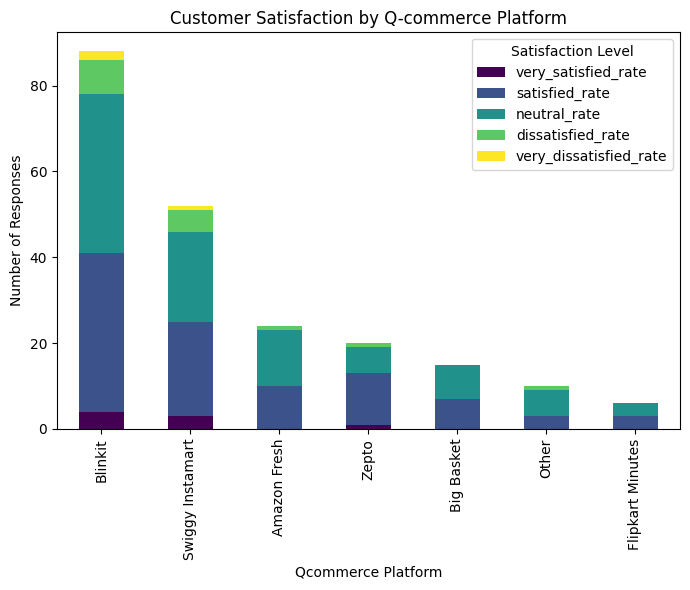

In [214]:
# Plot stacked bar with diverse satisfaction rate 
columns_toplot = ['very_satisfied_rate','satisfied_rate','neutral_rate','dissatisfied_rate','very_dissatisfied_rate']
price_rating_analysis.set_index('Qcommerce_platform', inplace= True)
price_rating_analysis[columns_toplot].plot(kind='bar', stacked=True, figsize=(7,6), colormap='viridis')
plt.title('Customer Satisfaction by Q-commerce Platform')
plt.xlabel('Qcommerce Platform')
plt.ylabel('Number of Responses')
plt.legend(title='Satisfaction Level')
plt.tight_layout()
plt.show()

#### Blinkit and Zepto receive the highest positive pricing satisfaction, with over 60% of consumers rating them favorably.

In [206]:
# Query and aggregate Recommendations of consumers
query = """
        SELECT platforms_online_shopping AS Qcommerce_platform, COUNT(*) AS Count,
        SUM(CASE WHEN likely_to_recommend = 'Very likely' THEN 1 ELSE 0 END) AS Very_Likely, 
        SUM(CASE WHEN likely_to_recommend = 'Likely' THEN 1 ELSE 0 END) AS Likely,
        SUM(CASE WHEN likely_to_recommend = 'Unlikely' THEN 1 ELSE 0 END) AS Unlikely,
        SUM(CASE WHEN likely_to_recommend = 'Neutral' THEN 1 ELSE 0 END) AS Neutral
        FROM `data-analysis-458211.dataset_1.consumer_behaviour_reviews`
        GROUP BY Qcommerce_platform
        ORDER BY Count DESC
        """

recommendations = client.query(query).to_dataframe()
recommendations.head(6)

,Qcommerce_platform,Count,Very_Likely,Likely,Unlikely,Neutral
0,Blinkit,88,31,44,3,10
1,Swiggy Instamart,52,24,19,1,8
2,Amazon Fresh,24,6,10,2,6
3,Zepto,20,6,11,0,3
4,Big Basket,15,6,6,0,3
5,Other,10,3,7,0,0


In [315]:
# Upload data to bigquery
to_gbq(
    dataframe=recommendations,
    destination_table='dataset_1.recommendations',
    project_id='data-analysis-458211',
    if_exists='replace'  
)

100%|██████████| 1/1 [00:00<00:00, 1310.72it/s]


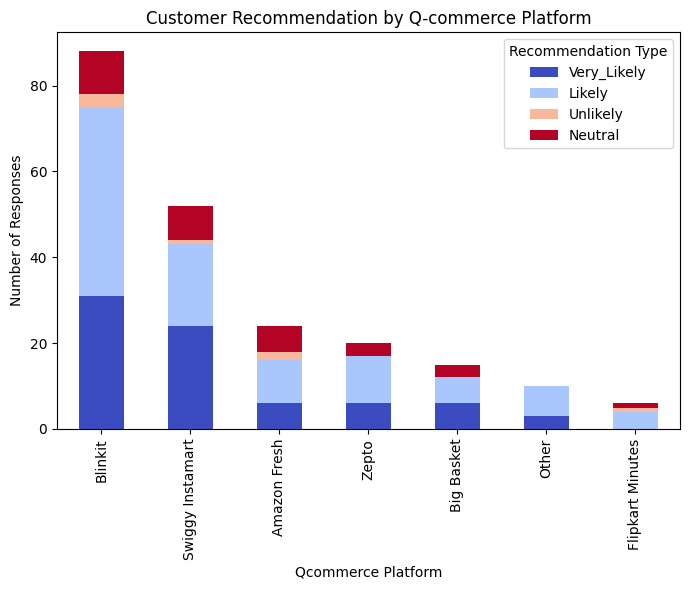

In [ ]:
# Plot stacked bar with customer recommendations for each Agents
columns_to_plot = ['Very_Likely', 'Likely', 'Unlikely', 'Neutral']

recommendations.set_index('Qcommerce_platform', inplace= True)
recommendations[columns_to_plot].plot(kind='bar', stacked=True, figsize=(7,6), colormap='coolwarm')
plt.title('Customer Recommendation by Q-commerce Platform')
plt.xlabel('Qcommerce Platform')
plt.ylabel('Number of Responses')
plt.legend(title='Recommendation Type')
plt.tight_layout()
plt.show()

#### Blinkit has the highest 'Very Likely to Recommend' share, leading overall recommendation scores among platforms.

In [ ]:
# Extract and read Google trends timeline data of target Qcommerce Platforms
qcommerce_trends_data = pd.read_csv("/Users/prudhvileo/Downloads/qcommerce_timelinedata.csv", skiprows=1)
qcommerce_trends_data

,Week,swiggy instamart: (India),blinkit: (India),zepto: (India)
0,2021-09-19,2,0,1
1,2021-09-26,2,0,1
2,2021-10-03,2,0,1
3,2021-10-10,2,0,1
4,2021-10-17,2,0,1
...,...,...,...,...
185,2025-04-06,12,87,73
186,2025-04-13,12,92,71
187,2025-04-20,11,95,70
188,2025-04-27,11,89,76


In [237]:
print(qcommerce_trends_data.dtypes) # Check datatypes

Week                         object
swiggy instamart: (India)     int64
blinkit: (India)              int64
zepto: (India)                int64
dtype: object


In [238]:
# Convert week column to datetime 
qcommerce_trends_data['Week'] = pd.to_datetime(qcommerce_trends_data['Week']) 

In [239]:
qcommerce_trends_data.head()

,Week,swiggy instamart: (India),blinkit: (India),zepto: (India)
0,2021-09-19,2,0,1
1,2021-09-26,2,0,1
2,2021-10-03,2,0,1
3,2021-10-10,2,0,1
4,2021-10-17,2,0,1


In [240]:
qcommerce_trends_data.dtypes

Week                         datetime64[ns]
swiggy instamart: (India)             int64
blinkit: (India)                      int64
zepto: (India)                        int64
dtype: object

In [241]:
qcommerce_trends_data.isnull().sum() # check for null values

Week                         0
swiggy instamart: (India)    0
blinkit: (India)             0
zepto: (India)               0
dtype: int64

In [249]:
# Update column names to match with Bigquery dataset standards
qcommerce_trends_data.columns = qcommerce_trends_data.columns.str.replace('[^0-9a-zA-Z]+','_',regex=True)

In [ ]:
# Verify updated column names
qcommerce_trends_data.columns

print(qcommerce_trends_data.head())

            swiggy_instamart_India_  blinkit_India_  zepto_India_
Week                                                             
2021-09-19                        2               0             1
2021-09-26                        2               0             1
2021-10-03                        2               0             1
2021-10-10                        2               0             1
2021-10-17                        2               0             1


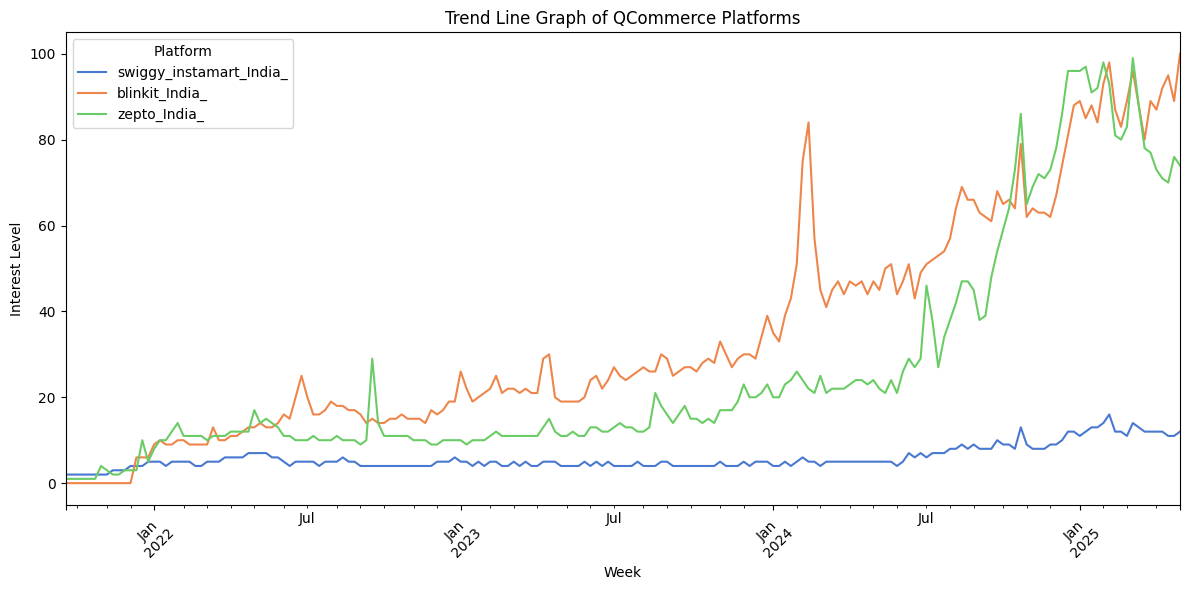

In [ ]:
# Plot a line chart comparing the target Agents to visualize trend patterns
qcommerce_trends_data.set_index('Week', inplace=True)

qcommerce_trends_data.plot(kind='line', figsize=(12,6))
plt.title("Trend Line Graph of QCommerce Platforms")
plt.xlabel("Week")
plt.ylabel("Interest Level")
plt.legend(title='Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Blinkit and Zepto consistently lead in Google search interest, indicating higher consumer mindshare over time.